In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Homework 1
## INFO 4871 / 5871
## Spencer Fairbairn

The purpose of this assignment is gain experience working with user profile data as commonly found in recommender systems. 

### Hints

The following functions of the Pandas API are worth refreshing your memory on:

- `read_csv`
- `DataFrame.groupby`
- `DataFrame.query`
- `DataFrame.join`
- `DataFrame.crosstab`

Also, the sections of the Pandas documentation on "Indexing and Selecting Data" and "Group By: split-apply-combine".

### More hints
The third-ranked item produced by each recommender should be:

- `PopFreq`: _Forrest Gump_
- `PopFreq` (Filtered): _Lord of the Rings: Fellowship of the Ring_
- `PopRating`: _Touch of Evil_
- `PopRating` (Filtered): _Fight Club_

## Step 1
Load the MovieLens data. There are three files: ratings.csv, movies.csv, tags.csv. Note: the files use "Latin 1" encoding. You'll need to include this information in the call to `read_csv`. Use the `head()` function to show the contents of each data frame after you read it. Hint: Your life will be easier later if you use `movies.set_index('movieId')` to set the index of the `movies` data frame to be the movie id. 

In [2]:
movies_df = pd.read_csv('movies.csv', encoding='latin1')
movies_df.columns = ['Movie_ID','Title', 'Genres']

movies_df.head()

,Movie_ID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings_df = pd.read_csv('ratings.csv', encoding='latin1')
ratings_df.columns = ['User_ID', 'Movie_ID', 'Rating', 'Timestamp']
ratings_df.head()

,User_ID,Movie_ID,Rating,Timestamp
0,12882,1,4.0,1147195252
1,12882,32,3.5,1147195307
2,12882,47,5.0,1147195343
3,12882,50,5.0,1147185499
4,12882,110,4.5,1147195239


In [4]:
movie_ratings_df = pd.merge(movies_df, ratings_df, left_on='Movie_ID',
                            right_on='Movie_ID', how='left')
movie_ratings_df.head()

,Movie_ID,Title,Genres,User_ID,Rating,Timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,12882,4.0,1147195252
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,121987,4.5,1308152264
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18127,4.0,1130946329
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17318,4.0,1168807334
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,69519,4.0,1303980621


In [5]:
tags_df = pd.read_csv('tags.csv', low_memory=False, encoding='latin1',parse_dates=['timestamp'])
tags_df.columns = ['Movie_ID', 'User_ID', 'Tag', 'Timestamp']
tags_df.head()

,Movie_ID,User_ID,Tag,Timestamp
0,3916,12882,sports,1147195545
1,4085,12882,Eddie Murphy,1147195966
2,33660,12882,boxing,1147195514
3,1197,320,must show,1145964801
4,1396,320,must show,1145964810


## Step 2

- Compute a rating count data frame: for each movie, how many times has it been rated? (Value of the rating doesn't count)
- Compute the minimum value. Identify the name of a movie that has this minimum count? INFO 5871: (optional for INFO 4871: No hard-coded values.)
- Compute the maximum value. Identify the name of a movie that has the maximum count? INFO 5871: (optional for INFO 4871: No hard-coded values.)
- Plot the rating count distribution as a histogram.


### Create the rating count data frame

In [6]:
movie_ratings_df.groupby('Title').size().sort_values(ascending=False).head()

Title
Matrix, The (1999)                                           668
Lord of the Rings: The Fellowship of the Ring, The (2001)    628
Forrest Gump (1994)                                          621
Pulp Fiction (1994)                                          613
Lord of the Rings: The Two Towers, The (2002)                597
dtype: int64

### Minimum rated movie
Hard-coded method

In [7]:
mini_movie_df = movie_ratings_df.groupby('Title').size().sort_values(ascending=False)
mini_movie_df.tail()

Title
Tales from the Hood (1995)    6
Two if by Sea (1996)          6
Program, The (1993)           5
Blue in the Face (1995)       5
War, The (1994)               3
dtype: int64

### Most-rated movie
Hard-coded method

In [8]:
most_rated = movie_ratings_df.groupby('Title').size().sort_values(ascending=False)[:25]
most_rated.head()

Title
Matrix, The (1999)                                           668
Lord of the Rings: The Fellowship of the Ring, The (2001)    628
Forrest Gump (1994)                                          621
Pulp Fiction (1994)                                          613
Lord of the Rings: The Two Towers, The (2002)                597
dtype: int64

## Step 3

- Compute the rating value distribution: for each possible rating value (0.5, 1,1.5,2.0,2.5, ..., 4.5, 5.0), how many movies have that rating?
- Plot the rating value distribution as a line plot

In [9]:
counting_movie_ratings_df = movie_ratings_df.groupby('Rating')['Title'].size()
counting_movie_ratings_df

Rating
0.5     3595
1.0     5543
1.5     5716
2.0    15978
2.5    19017
3.0    44574
3.5    47305
4.0    66481
4.5    30529
5.0    25767
Name: Title, dtype: int64

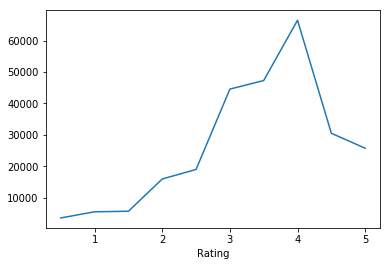

In [10]:
counting_movie_ratings_df.plot()

### _Question:_ What does this distribution tell you about the kind of preferences represented in the MovieLens data set?

While looking at the distribution I can see that there is a trend towards people rating movies based on a happy medium. By this I mean the 3 highest ratings are 4, 3.5 and 3 this means people liked the movie either more than they hated it or that they didn't love it but still really liked it. People barely rated movies low scores aswell.

## Step 4

- Compute the profile length distribution: for each user, how many ratings have they contributed?
- Compute the minimum value. Identify the id of the user that has this minimum count?
- Compute the maximum value. Identify the id of the user that has the maximum count?
- Plot the profile length distribution as a histogram.


### Create the profile length data frame

In [11]:
high_profile_count_df = movie_ratings_df.groupby('User_ID').size().sort_values(ascending=False)[:25]
high_profile_count_df.head()

User_ID
76630     1900
133811    1555
70201     1499
79531     1495
42096     1412
dtype: int64

In [12]:
low_profile_count_df = movie_ratings_df.groupby('User_ID').size().sort_values(ascending=True)[:25]
low_profile_count_df.head()

User_ID
138176    14
128079    15
56478     15
83479     16
93347     17
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117cd2278>]],
      dtype=object)

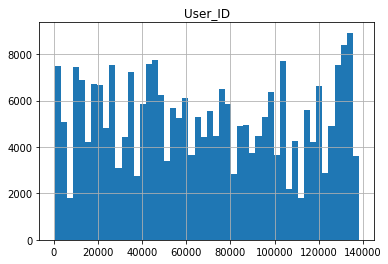

In [20]:
movie_ratings_df.hist('User_ID', bins = 50)

## Step 5
Build a non-personalized popularity-based top 20 recommender. Ignore the value of the rating and just count how many times a movie appears in someone's ratings. We will call this `PopFreq`.

Can re-use some of the results from above. Sort in descending order

In [14]:
PopMov_df = movie_ratings_df[['Movie_ID', 'User_ID']].groupby('Movie_ID').count()
PopMov_df.sort_values('User_ID', ascending = False)


,User_ID
Movie_ID,
2571,668
4993,628
356,621
296,613
5952,597
2959,588
7153,577
318,564
260,535


Join against the movie table to see what movies these are.

In [15]:
PopFreq = pd.merge(movies_df, PopMov_df, left_on='Movie_ID',
                            right_on='Movie_ID', how='left')
PopFreq = PopFreq.sort_values('User_ID', ascending = False)
PopFreq = PopFreq.drop(['Genres'], axis = 1)
PopFreq.head(20)

,Movie_ID,Title,User_ID
1210,2571,"Matrix, The (1999)",668
1854,4993,"Lord of the Rings: The Fellowship of the Ring,...",628
213,356,Forrest Gump (1994),621
176,296,Pulp Fiction (1994),613
1959,5952,"Lord of the Rings: The Two Towers, The (2002)",597
1355,2959,Fight Club (1999),588
2075,7153,"Lord of the Rings: The Return of the King, The...",577
189,318,"Shawshank Redemption, The (1994)",564
157,260,Star Wars: Episode IV - A New Hope (1977),535
335,593,"Silence of the Lambs, The (1991)",533


## Step 6
Build non-peraonalized recommender that orders the movies by average rating. We will call this version `PopRating`.

In [16]:
user_rating_count = movie_ratings_df[['Movie_ID','Rating','Title']].groupby('Movie_ID').mean()
user_rating_count

,Rating
Movie_ID,
1,3.793347
2,3.069892
3,2.923077
4,2.576923
5,2.848684
6,3.818182
7,3.250000
9,2.634615
10,3.335968


In [17]:
user_rating_count.sort_values('Rating', ascending = False)

,Rating
Movie_ID,
318,4.364362
858,4.315848
1248,4.259259
2959,4.258503
7502,4.247423
1203,4.246032
2859,4.220000
1221,4.218462
296,4.217781


In [18]:
PopRating = pd.merge(movies_df, user_rating_count, left_on='Movie_ID',
                            right_on='Movie_ID', how='left')
PopRating = PopRating.drop('Genres', axis = 1)
PopRating = PopRating.sort_values('Rating', ascending = False)
PopRating.head(20)

,Movie_ID,Title,Rating
189,318,"Shawshank Redemption, The (1994)",4.364362
422,858,"Godfather, The (1972)",4.315848
632,1248,Touch of Evil (1958),4.259259
1355,2959,Fight Club (1999),4.258503
2110,7502,Band of Brothers (2001),4.247423
591,1203,12 Angry Men (1957),4.246032
1317,2859,Stop Making Sense (1984),4.220000
608,1221,"Godfather: Part II, The (1974)",4.218462
176,296,Pulp Fiction (1994),4.217781
1210,2571,"Matrix, The (1999)",4.195359


### _Question:_ This list is quite different from the `PopFreq` list. What must be true of "The Godfather" for it to appear on this list, but not the other one?

"The Godfather" is in this list because it has a higher rating but it doesnt have that many people rating the movie meaning that it isnt in the first list.